In [1]:
# Step 0: Install and Import Libraries
# No additional installs needed for basics, but for visualization:
!pip install seaborn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load the Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

Numerical features for outlier detection: ['age', 'avg_glucose_level', 'bmi']


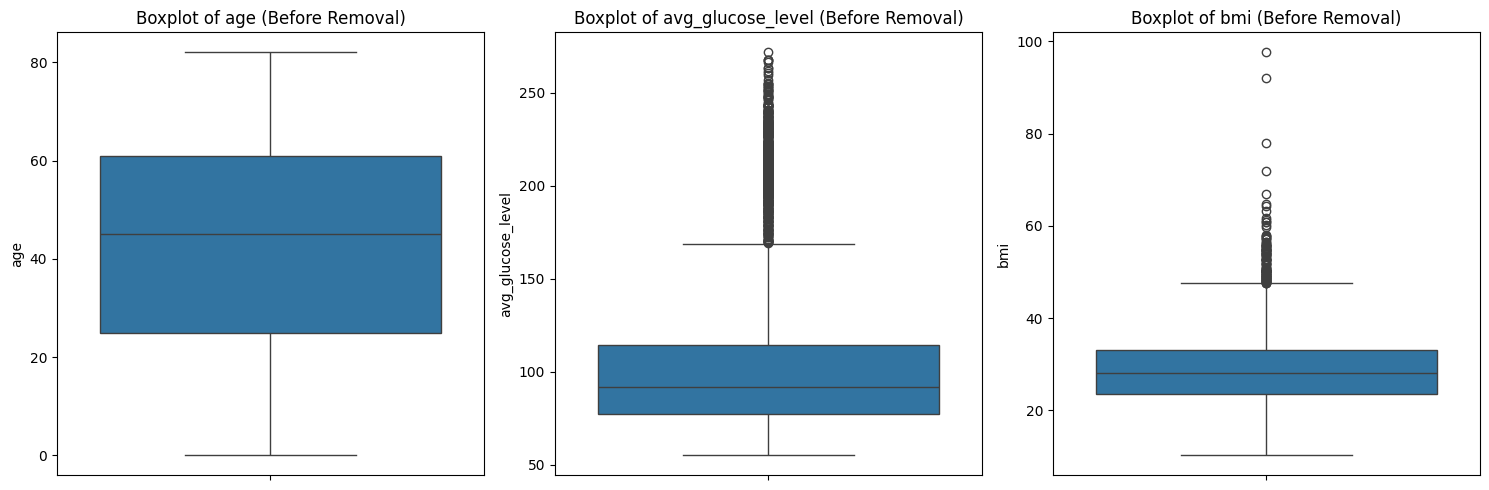


Shape after outlier removal: (4253, 12)
Removed 857 rows (16.77% of data)


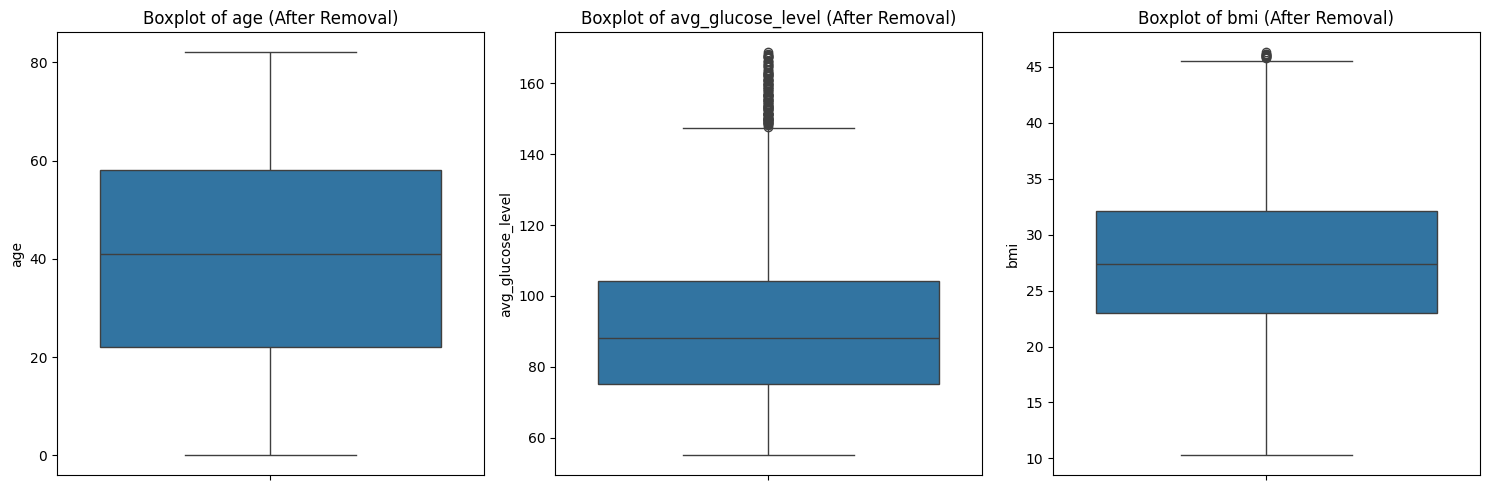

In [11]:
# Step 4: Outlier Removal
numerical_features = ['age', 'avg_glucose_level', 'bmi']
print("Numerical features for outlier detection:", numerical_features)

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Visualize before removal (optional)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_features):
    sns.boxplot(data=df_processed, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} (Before Removal)')
plt.tight_layout()
plt.show()

# Remove outliers
df_no_outliers = remove_outliers(df_processed, numerical_features)
print("\nShape after outlier removal:", df_no_outliers.shape)
print(f"Removed {df_processed.shape[0] - df_no_outliers.shape[0]} rows ({((df_processed.shape[0] - df_no_outliers.shape[0]) / df_processed.shape[0] * 100):.2f}% of data)")

# Visualize after (optional)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_features):
    sns.boxplot(data=df_no_outliers, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} (After Removal)')
plt.tight_layout()
plt.show()